<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de Algoritmos Genéticos

### Ajuste de curvas con AG

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

### Ejemplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 +2*x+np.random.normal(loc=0, scale=2, size=(N,))

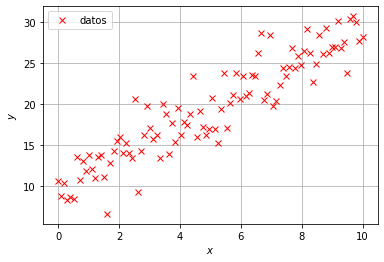

In [3]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [4]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [5]:
help(opt.optimize)

Help on module scipy.optimize.optimize in scipy.optimize:

NAME
    scipy.optimize.optimize

DESCRIPTION
    #__docformat__ = "restructuredtext en"
    # ******NOTICE***************
    # optimize.py module by Travis E. Oliphant
    #
    # You may copy and use this module as you see fit with no
    # guarantee implied provided you keep this notice in all copies.
    # *****END NOTICE************

CLASSES
    builtins.UserWarning(builtins.Warning)
        OptimizeWarning
    builtins.dict(builtins.object)
        OptimizeResult
    
    class OptimizeResult(builtins.dict)
     |  Represents the optimization result.
     |  
     |  Attributes
     |  ----------
     |  x : ndarray
     |      The solution of the optimization.
     |  success : bool
     |      Whether or not the optimizer exited successfully.
     |  status : int
     |      Termination status of the optimizer. Its value depends on the
     |      underlying solver. Refer to `message` for details.
     |  message : str

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

In [6]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [7]:
beta_ini = [0,0]

In [8]:
solucion = opt.minimize(fun = min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 2.671670858381932
 hess_inv: array([[ 3.93713589, -0.58757845],
       [-0.58757845,  0.11753952]])
      jac: array([ 0.00000000e+00, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([9.78677128, 1.94479596])

In [9]:
Beta = solucion.x
Beta

array([9.78677128, 1.94479596])

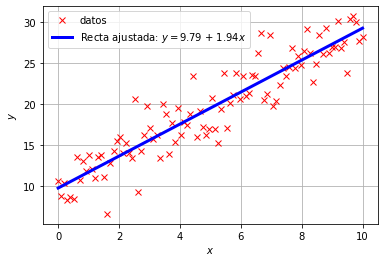

In [10]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat = Beta[0] + Beta[1]*x

plt.plot(x,f_hat,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo aplicariamos esto con AG?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def rulette_wheel_selection(p):
    c=np.cumsum(p)
    r=sum(p)*np.random.rand()
    
    ind= np.argwhere(r<=c)
    return ind[0][0]

def crossover(p1,p2):
    c1=copy.deepcopy(p1)
    c2=copy.deepcopy(p2)
    alpha = np.random.uniform(0,1,(c1['position'].shape))
    c1['position']= alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position']= alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2

def mutate(c, mu, sigma):
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma*np.random.rand(*ind.shape)
    return y

def bounds(c,varmin,varmax):
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    
def sort(arr):
    n=len(arr)
    for i in range(n-1):
        for j in range(0,n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [12]:
def ga(costfun, x_points, y_points, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
    
    #inicializar la población
    population={}
    for i in range(npop):
        population[i] = {'position': None, 'cost':None} 
    
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf
        
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        population[i]['cost'] = costfun(population[i]['position'],x_points, y_points,)
        
        if population[i]['cost'] < bestsol_cost:
            bestsol = copy.deepcopy(population[i])
    
    print('best_sol: {}'.format(bestsol))
    
    bestcost = np.empty(maxit)
    bestsolution = np.empty((maxit,num_var))
    
    for it in range(maxit):
        #calcular las probabilidades de la ruleta
        costs=[]
        for i in range(len(population)):
            costs.append(population[i]['cost'])
        costs = np.array(costs)
        avg_cost = np.mean(costs)

        if avg_cost !=0:
            costs = costs/avg_cost

        props = np.exp(-beta*costs)
        
        for _ in range(num_children//2):
            
            # selección por ruleta
            p1 = population[rulette_wheel_selection(props)]
            p2 = population[rulette_wheel_selection(props)]
            
            # Crossover de los padres
            c1, c2 = crossover(p1,p2)
            
            # Realizar la mutación
            c1=mutate(c1,mu,sigma)
            c2=mutate(c2,mu,sigma)
            
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)
            
            #evaluar la función de costo
            c1['cost'] = costfun(c1['position'],x_points,y_points)
            c2['cost'] = costfun(c2['position'],x_points,y_points)
            
            if type(bestsol_cost)==float:
                if c1['cost']<bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost']<bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

            if c2['cost']<bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
                
        #juntar la poblacion de la generación anterior con la nueva
        population[len(population)] = c1
        population[len(population)] = c2
        
        population = sort(population)
        
        #almacenar el history
        bestcost[it] = bestsol_cost['cost']
        bestsolution[it] = bestsol_cost['position']
        
        print('iteración {}, best_sol {}, best_cost {}'.format(it,bestsolution[it],bestcost[it]))
        
    out = population
    return (out, bestsolution, bestcost)

In [13]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 +2*x+np.random.normal(loc=0, scale=2, size=(N,))

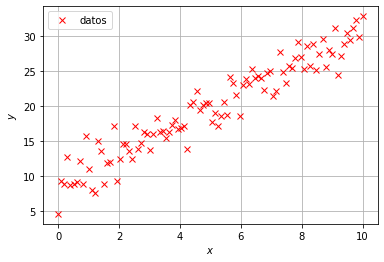

In [14]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [15]:
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

best_sol: {'position': array([ 0.95575854, -1.24196564]), 'cost': 365.8109016254961}
iteración 0, best_sol [8.41279165 1.6187947 ], best_cost 8.722079393128066
iteración 1, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 2, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 3, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 4, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 5, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 6, best_sol [7.06289223 2.02241801], best_cost 5.4337367409439095
iteración 7, best_sol [5.50536552 2.66553453], best_cost 3.240074705542123
iteración 8, best_sol [5.50536552 2.66553453], best_cost 3.240074705542123
iteración 9, best_sol [5.50536552 2.66553453], best_cost 3.240074705542123
iteración 10, best_sol [5.50536552 2.66553453], best_cost 3.240074705542123
iteración 11, best_sol [5.50536552 2.66553453], best_cost 3.240074705542123
iteraci

iteración 136, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 137, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 138, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 139, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 140, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 141, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 142, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 143, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 144, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 145, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 146, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 147, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 148, best_sol [8.54975286 2.20996227], best_cost 1.911

iteración 246, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 247, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 248, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 249, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 250, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 251, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 252, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 253, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 254, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 255, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 256, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 257, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 258, best_sol [8.54975286 2.20996227], best_cost 1.911

iteración 355, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 356, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 357, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 358, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 359, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 360, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 361, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 362, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 363, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 364, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 365, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 366, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 367, best_sol [8.54975286 2.20996227], best_cost 1.911

iteración 461, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 462, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 463, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 464, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 465, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 466, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 467, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 468, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 469, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 470, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 471, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 472, best_sol [8.54975286 2.20996227], best_cost 1.9116585596248599
iteración 473, best_sol [8.54975286 2.20996227], best_cost 1.911

<function matplotlib.pyplot.show(close=None, block=None)>

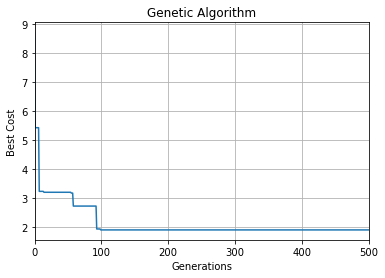

In [19]:
# Problem definition
costfunc = min_sqe
num_var = 2       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 501                                              # number of iterations
npop = 20                                                # initial population size
beta = 1
prop_children = 1                                        # proportion of children to population
num_children = int(np.round(prop_children * npop/2)*2)   # making sure it always an even number
mu = 0.2                                                 # mutation rate 20%, 205 of 5 is 1, mutating 1 gene
sigma = 0.1                                              # step size of mutation


# Run GA
out = ga(costfunc, x, y, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

In [20]:
Beta_ag =out[1][-1]
Beta_ag

array([8.54975286, 2.20996227])

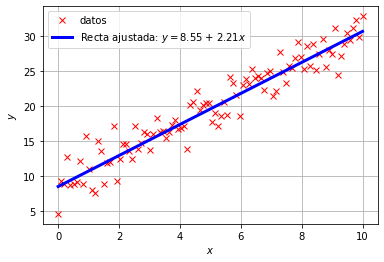

In [21]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat = Beta_ag[0] + Beta_ag[1]*x

plt.plot(x,f_hat,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_ag[0],2)} + {np.round(Beta_ag[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()